In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))  # add project root to sys.path

from markov_agent_chain import MarkovAgentChain, load_agents_for_chain

In [2]:
def test_markov_chain_simulation(testing_mode=True):
  """
  Run Markov chain simulation where each agent is a state.
  State transitions i→i trigger reflections, i→j trigger conversations.
  """
  print("=== Markov Agent Chain Simulation ===")
  
  # Load agents for the chain
  agent_names = ["rowan_greenwood", "jasmine_carter", "mina_kim", "kemi_adebayo", "pema_sherpa", "carlos_mendez", "bianca_silva", "mei_chen"]
  agents = load_agents_for_chain("Synthetic", agent_names)
  
  if len(agents) < 2:
    print("Error: Could not load required agents")
    return None
  
  # Create Markov chain and run simulation
  chain = MarkovAgentChain()
  
  results = chain.run_markov_chain(
    agents=agents,
    context="Local community market and social interactions",
    num_steps=120,
    self_reflection_prob=0.3,  # 30% chance to stay in same state (reflect)
    interaction_prob=0.7,      # 70% chance to transition to other agent (converse)
    conversation_max_turns=8,
    testing_mode=testing_mode
  )
  
  print("=== Simulation Results ===")
  print(f"Total conversations: {results['conversation_count']}")
  print(f"Total reflections: {results['reflection_count']}")
  print(f"Final agent state: {results['final_agent']}")
  
  return results



In [3]:
results = test_markov_chain_simulation(testing_mode=False)

=== Markov Agent Chain Simulation ===
Loaded rowan_greenwood:Synthetic
Loaded: Rowan Greenwood
Loaded jasmine_carter:Synthetic
Loaded: Jasmine Carter
Loaded mina_kim:Synthetic
Loaded: Mina Kim
Loaded kemi_adebayo:Synthetic
Loaded: Kemi Adebayo
Loaded pema_sherpa:Synthetic
Loaded: Pema Sherpa
Loaded carlos_mendez:Synthetic
Loaded: Carlos Mendez
Loaded bianca_silva:Synthetic
Loaded: Bianca Silva
Loaded mei_chen:Synthetic
Loaded: Mei Chen
=== Markov Agent Chain Simulation ===
Agents (States): ['Rowan Greenwood', 'Jasmine Carter', 'Mina Kim', 'Kemi Adebayo', 'Pema Sherpa', 'Carlos Mendez', 'Bianca Silva', 'Mei Chen']
Steps: 120
Self-reflection probability: 0.3
Interaction probability: 0.7
Context: Local community market and social interactions

Transition Matrix (Agent States):
      Rowan Gr  Jasmine   Mina Kim  Kemi Ade  Pema She  Carlos M  Bianca S  Mei Chen
Rowan Gr 0.300  0.100  0.100  0.100  0.100  0.100  0.100  0.100
Jasmine  0.100  0.300  0.100  0.100  0.100  0.100  0.100  0.100
Mi

In [4]:
results['interaction_history']
# Save results to a json file
import json
with open('markov_agents_results_v4_120.json', 'w') as f:
    json.dump(results, f)

In [1]:
# open results.json
import json
with open('markov_agents_results_v4_120.json', 'r') as f:
    results = json.load(f)

results['interaction_history']

[{'type': 'reflection',
  'step': 1,
  'agent': 'Rowan Greenwood',
  'anchor': 'recent interactions and experiences in Local community market and social interactions'},
 {'type': 'conversation',
  'step': 2,
  'participants': ['Rowan Greenwood', 'Mina Kim'],
  'context': 'Local community market and social interactions',
  'dialogue': [['Rowan Greenwood',
    'Morning. The air’s got that piney chill—good drying weather. If you’re browsing, I’ve jars of herbal tea and a brisk black tea today, plus a few medicinal cannabis tins. The herbal blend leans floral with a minty lift; the black is sturdy and slightly malty. No rush—listen to your body and your nose. If something calls to you, just tap your digital cash on my little machine and I’ll wrap it snug. Otherwise, you’re welcome to just take in the scents.'],
   ['Mina Kim',
    'Oh, hi... the piney air does feel really nice. I think I might just smell a couple, if that’s okay. The herbal one sounds lovely—floral with mint always makes m

Ordered transitions (step: from → to, kind):
1: Rowan Greenwood → Rowan Greenwood (reflection)
2: Rowan Greenwood → Mina Kim (conversation)
3: Mina Kim → Mina Kim (reflection)
4: Mina Kim → Mei Chen (conversation)
5: Mei Chen → Jasmine Carter (conversation)
6: Jasmine Carter → Carlos Mendez (conversation)
7: Carlos Mendez → Carlos Mendez (reflection)
8: Carlos Mendez → Carlos Mendez (reflection)
9: Carlos Mendez → Jasmine Carter (conversation)
10: Jasmine Carter → Bianca Silva (conversation)
11: Bianca Silva → Pema Sherpa (conversation)
12: Pema Sherpa → Jasmine Carter (conversation)
13: Jasmine Carter → Rowan Greenwood (conversation)
14: Rowan Greenwood → Mei Chen (conversation)
15: Mei Chen → Mei Chen (reflection)
16: Mei Chen → Mina Kim (conversation)
17: Mina Kim → Kemi Adebayo (conversation)
18: Kemi Adebayo → Pema Sherpa (conversation)
19: Pema Sherpa → Bianca Silva (conversation)
20: Bianca Silva → Jasmine Carter (conversation)
21: Jasmine Carter → Kemi Adebayo (conversation)
22

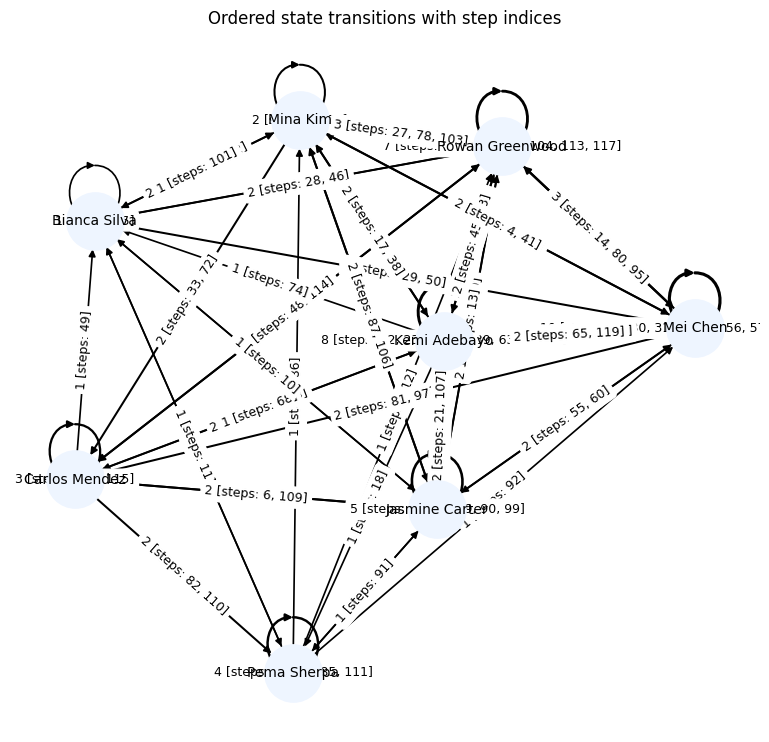

In [2]:
# Ordered Markov state transitions (by step) and flow graph with step labels
import math
import matplotlib.pyplot as plt

try:
  import networkx as nx
except ImportError:
  import sys, subprocess
  subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx==3.2.1"])  # safety
  import networkx as nx

blocks = results.get('interaction_history', []) if isinstance(results, dict) else []
if not blocks:
  print("No interaction_history found in results.")
else:
  # Build ordered transitions list from history
  ordered = []
  for b in sorted(blocks, key=lambda x: x.get('step', 0)):
    if b.get('type') == 'conversation':
      participants = b.get('participants', [])
      if len(participants) == 2:
        ordered.append({'step': b.get('step'), 'from': participants[0], 'to': participants[1], 'kind': 'conversation'})
    elif b.get('type') == 'reflection':
      a = b.get('agent')
      ordered.append({'step': b.get('step'), 'from': a, 'to': a, 'kind': 'reflection'})

  if not ordered:
    print("No transitions could be derived from interaction_history.")
  else:
    # Print ordered list to verify jumps
    print("Ordered transitions (step: from → to, kind):")
    for t in ordered:
      print(f"{t['step']}: {t['from']} → {t['to']} ({t['kind']})")

    # Aggregate by edge and keep step list to preserve order
    from collections import defaultdict
    edge_steps = defaultdict(list)
    nodes = set()
    for t in ordered:
      edge_steps[(t['from'], t['to'])].append(t['step'])
      nodes.add(t['from']); nodes.add(t['to'])

    # Build graph
    G = nx.DiGraph()
    for n in nodes:
      G.add_node(n)
    for (a, b), steps in edge_steps.items():
      G.add_edge(a, b, weight=len(steps), steps=sorted(steps))

    # Draw graph with labels showing counts and step numbers
    plt.figure(figsize=(7.5, 7.0))
    pos = nx.spring_layout(G, seed=11, k=0.9)
    weights = [G[u][v]['weight'] for u, v in G.edges()] if G.number_of_edges() > 0 else []
    widths = [0.8 + 0.6 * math.log1p(w) for w in weights] if weights else 1.0

    nx.draw(
      G,
      pos,
      with_labels=True,
      node_size=1700,
      node_color="#eef5ff",
      arrows=True,
      width=widths,
      font_size=10,
    )

    if G.number_of_edges() > 0:
      edge_labels = {}
      for u, v, data in G.edges(data=True):
        steps = data.get('steps', [])
        edge_labels[(u, v)] = f"{data.get('weight', 1)} [steps: {', '.join(map(str, steps))}]"
      nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title("Ordered state transitions with step indices")
    plt.axis('off')
    plt.show()


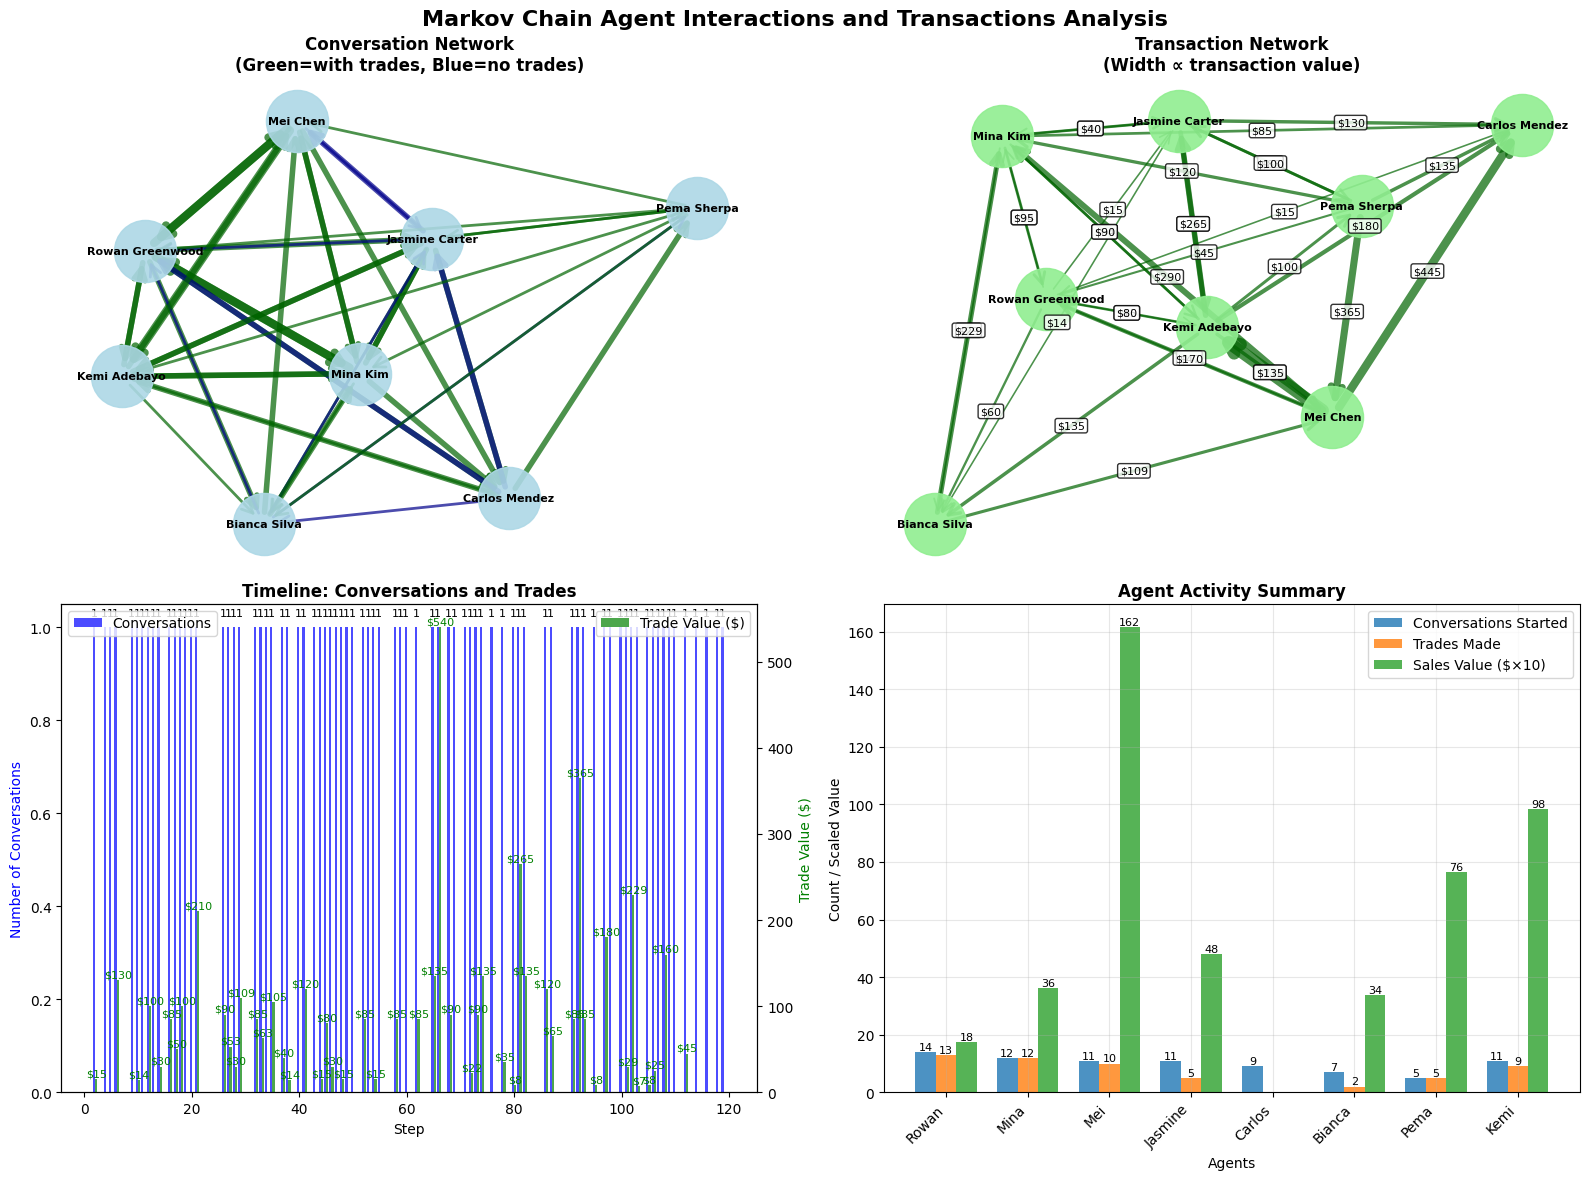


INTERACTION AND TRANSACTION SUMMARY
Total Conversations: 80
Conversations with Trades: 58
Total Transactions: 56
Total Transaction Value: $4720.50
Average Transaction Value: $84.29
Most Active Seller: Rowan Greenwood (13 transactions)
Most Active Buyer: Mina Kim (10 transactions)


In [3]:
# Enhanced Interaction Flow Visualization - Fixed for correct data structure
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def create_interaction_flow_visualization(results):
    """Create comprehensive visualizations for interaction and transaction flows"""
    
    # Extract interaction history
    interactions = results.get('interaction_history', [])
    if not interactions:
        print("No interaction history found")
        return
    
    # Parse interactions and transactions with corrected structure
    conversation_flows = []
    transaction_flows = []
    
    for interaction in interactions:
        if interaction.get('type') == 'conversation':
            participants = interaction.get('participants', [])
            if len(participants) == 2:
                # Check if there were any trades in this conversation
                trades = interaction.get('trades', [])
                has_trade = len(trades) > 0
                
                conversation_flows.append({
                    'step': interaction.get('step', 0),
                    'from': participants[0],
                    'to': participants[1],
                    'has_trade': has_trade
                })
                
                # Extract trade details from the trades array
                for trade in trades:
                    if trade.get('executed') and trade.get('trade_details'):
                        trade_details = trade['trade_details']
                        # Calculate total value from items
                        items = trade_details.get('items', [])
                        # Only count non-digital-cash items for value
                        value = sum(item.get('value', 0) for item in items if item.get('name') != 'digital cash')
                        
                        transaction_flows.append({
                            'step': interaction.get('step', 0),
                            'seller': trade_details.get('participants', {}).get('seller', ''),
                            'buyer': trade_details.get('participants', {}).get('buyer', ''),
                            'items': [item.get('name', '') for item in items if item.get('name') != 'digital cash'],
                            'value': value
                        })
    
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Markov Chain Agent Interactions and Transactions Analysis', fontsize=16, fontweight='bold')
    
    # 1. Interaction Network
    create_interaction_network(conversation_flows, ax1)
    
    # 2. Transaction Network
    create_transaction_network(transaction_flows, ax2)
    
    # 3. Timeline Analysis
    create_timeline_analysis(conversation_flows, transaction_flows, ax3)
    
    # 4. Agent Activity Summary
    create_agent_summary(conversation_flows, transaction_flows, ax4)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print_summary_stats(conversation_flows, transaction_flows)

def create_interaction_network(conversations, ax):
    """Create network diagram of conversations"""
    if not conversations:
        ax.text(0.5, 0.5, 'No conversations found', ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Conversation Network')
        return
        
    # Count interactions between agents
    interaction_counts = defaultdict(int)
    trade_counts = defaultdict(int)
    
    for conv in conversations:
        key = (conv['from'], conv['to'])
        interaction_counts[key] += 1
        if conv['has_trade']:
            trade_counts[key] += 1
    
    # Create network graph
    G = nx.DiGraph()
    for (from_agent, to_agent), count in interaction_counts.items():
        G.add_edge(from_agent, to_agent, weight=count, trades=trade_counts[(from_agent, to_agent)])
    
    # Layout and drawing
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=2000, alpha=0.9, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax)
    
    # Draw edges with varying thickness
    for (u, v, data) in G.edges(data=True):
        width = data['weight'] * 2
        color = 'darkgreen' if data['trades'] > 0 else 'darkblue'
        nx.draw_networkx_edges(G, pos, [(u, v)], width=width, 
                              alpha=0.7, edge_color=color, ax=ax,
                              arrowsize=20, arrowstyle='->')
    
    ax.set_title('Conversation Network\n(Green=with trades, Blue=no trades)', fontweight='bold')
    ax.axis('off')

def create_transaction_network(transactions, ax):
    """Create network diagram of transactions"""
    if not transactions:
        ax.text(0.5, 0.5, 'No transactions found', ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Transaction Network')
        return
        
    # Aggregate transaction values
    trade_values = defaultdict(float)
    trade_counts = defaultdict(int)
    
    for trade in transactions:
        key = (trade['seller'], trade['buyer'])
        trade_values[key] += trade['value']
        trade_counts[key] += 1
    
    # Create network graph
    G = nx.DiGraph()
    for (seller, buyer), value in trade_values.items():
        G.add_edge(seller, buyer, value=value, count=trade_counts[(seller, buyer)])
    
    # Layout and drawing
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', 
                          node_size=2000, alpha=0.9, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax)
    
    # Draw edges with thickness proportional to value
    if trade_values:
        max_value = max(trade_values.values())
        for (u, v, data) in G.edges(data=True):
            width = (data['value'] / max_value) * 8 + 1 if max_value > 0 else 2
            nx.draw_networkx_edges(G, pos, [(u, v)], width=width, 
                                  alpha=0.7, edge_color='darkgreen', ax=ax,
                                  arrowsize=20, arrowstyle='->')
            
            # Add value labels
            edge_pos = ((pos[u][0] + pos[v][0])/2, (pos[u][1] + pos[v][1])/2)
            ax.text(edge_pos[0], edge_pos[1], f'${data["value"]:.0f}', 
                   fontsize=8, ha='center', va='center', 
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))
    
    ax.set_title('Transaction Network\n(Width ∝ transaction value)', fontweight='bold')
    ax.axis('off')

def create_timeline_analysis(conversations, transactions, ax):
    """Create timeline of interactions and transactions"""
    if not conversations and not transactions:
        ax.text(0.5, 0.5, 'No data for timeline', ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Timeline Analysis')
        return
        
    # Get all steps
    all_steps = set()
    if conversations:
        all_steps.update(conv['step'] for conv in conversations)
    if transactions:
        all_steps.update(trade['step'] for trade in transactions)
    
    steps = sorted(all_steps)
    
    # Count events per step
    conv_counts = defaultdict(int)
    trade_values = defaultdict(float)
    
    for conv in conversations:
        conv_counts[conv['step']] += 1
        
    for trade in transactions:
        trade_values[trade['step']] += trade['value']
    
    # Create timeline plot
    x = np.array(steps)
    conv_y = [conv_counts[step] for step in steps]
    trade_y = [trade_values[step] for step in steps]
    
    # Dual y-axis
    ax2 = ax.twinx()
    
    bars1 = ax.bar(x - 0.2, conv_y, 0.4, label='Conversations', alpha=0.7, color='blue')
    bars2 = ax2.bar(x + 0.2, trade_y, 0.4, label='Trade Value ($)', alpha=0.7, color='green')
    
    ax.set_xlabel('Step')
    ax.set_ylabel('Number of Conversations', color='blue')
    ax2.set_ylabel('Trade Value ($)', color='green')
    ax.set_title('Timeline: Conversations and Trades', fontweight='bold')
    
    # Add value labels
    for bar, val in zip(bars1, conv_y):
        if val > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                   str(int(val)), ha='center', va='bottom', fontsize=8)
    
    for bar, val in zip(bars2, trade_y):
        if val > 0:
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'${val:.0f}', ha='center', va='bottom', fontsize=8, color='green')
    
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

def create_agent_summary(conversations, transactions, ax):
    """Create summary of agent activities"""
    # Collect agent stats
    agent_stats = defaultdict(lambda: {'conversations_initiated': 0, 'conversations_received': 0, 
                                      'trades_sold': 0, 'trades_bought': 0, 
                                      'value_sold': 0, 'value_bought': 0})
    
    for conv in conversations:
        agent_stats[conv['from']]['conversations_initiated'] += 1
        agent_stats[conv['to']]['conversations_received'] += 1
    
    for trade in transactions:
        agent_stats[trade['seller']]['trades_sold'] += 1
        agent_stats[trade['seller']]['value_sold'] += trade['value']
        agent_stats[trade['buyer']]['trades_bought'] += 1
        agent_stats[trade['buyer']]['value_bought'] += trade['value']
    
    # Create summary visualization
    agents = list(agent_stats.keys())
    if not agents:
        ax.text(0.5, 0.5, 'No agent data', ha='center', va='center', transform=ax.transAxes)
        return
        
    # Prepare data
    conv_init = [agent_stats[agent]['conversations_initiated'] for agent in agents]
    trades_sold = [agent_stats[agent]['trades_sold'] for agent in agents]
    value_sold = [agent_stats[agent]['value_sold']/10 for agent in agents]  # Scale for visibility
    
    # Create grouped bar chart
    x = np.arange(len(agents))
    width = 0.25
    
    bars1 = ax.bar(x - width, conv_init, width, label='Conversations Started', alpha=0.8)
    bars2 = ax.bar(x, trades_sold, width, label='Trades Made', alpha=0.8)
    bars3 = ax.bar(x + width, value_sold, width, label='Sales Value ($×10)', alpha=0.8)
    
    ax.set_xlabel('Agents')
    ax.set_ylabel('Count / Scaled Value')
    ax.set_title('Agent Activity Summary', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([name.split()[0] for name in agents], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                       f'{height:.0f}', ha='center', va='bottom', fontsize=8)

def print_summary_stats(conversations, transactions):
    """Print summary statistics"""
    print("\n" + "="*50)
    print("INTERACTION AND TRANSACTION SUMMARY")
    print("="*50)
    
    print(f"Total Conversations: {len(conversations)}")
    print(f"Conversations with Trades: {sum(1 for c in conversations if c['has_trade'])}")
    print(f"Total Transactions: {len(transactions)}")
    
    if transactions:
        total_value = sum(t['value'] for t in transactions)
        avg_value = total_value / len(transactions)
        print(f"Total Transaction Value: ${total_value:.2f}")
        print(f"Average Transaction Value: ${avg_value:.2f}")
        
        # Most active traders
        sellers = defaultdict(int)
        buyers = defaultdict(int)
        for t in transactions:
            sellers[t['seller']] += 1
            buyers[t['buyer']] += 1
            
        if sellers:
            top_seller = max(sellers.items(), key=lambda x: x[1])
            print(f"Most Active Seller: {top_seller[0]} ({top_seller[1]} transactions)")
            
        if buyers:
            top_buyer = max(buyers.items(), key=lambda x: x[1])
            print(f"Most Active Buyer: {top_buyer[0]} ({top_buyer[1]} transactions)")

# Run the visualization
create_interaction_flow_visualization(results)

In [4]:
from collections import defaultdict

# Detailed Transaction Analysis - Fixed for correct data structure
def analyze_transaction_patterns(results):
    """Analyze detailed transaction patterns and item flows"""
    
    interactions = results.get('interaction_history', [])
    transactions = []
    
    # Extract all transaction details with corrected structure
    for interaction in interactions:
        if interaction.get('type') == 'conversation':
            trades = interaction.get('trades', [])
            for trade in trades:
                if trade.get('executed') and trade.get('trade_details'):
                    trade_details = trade['trade_details']
                    items = trade_details.get('items', [])
                    # Filter out digital cash from items list for cleaner analysis
                    actual_items = [item for item in items if item.get('name') != 'digital cash']
                    
                    transactions.append({
                        'step': interaction.get('step', 0),
                        'seller': trade_details.get('participants', {}).get('seller', ''),
                        'buyer': trade_details.get('participants', {}).get('buyer', ''),
                        'items': actual_items,
                        'total_value': sum(item.get('value', 0) for item in actual_items)
                    })
    
    if not transactions:
        print("No transactions found in the data")
        return
    
    print("\n" + "="*60)
    print("DETAILED TRANSACTION ANALYSIS")
    print("="*60)
    
    # 1. Transaction by transaction breakdown
    print("\n1. TRANSACTION BREAKDOWN:")
    print("-" * 40)
    for i, trade in enumerate(transactions, 1):
        print(f"\nTransaction {i} (Step {trade['step']}):")
        print(f"  Seller: {trade['seller']}")
        print(f"  Buyer: {trade['buyer']}")
        print(f"  Items:")
        for item in trade['items']:
            print(f"    - {item.get('name', 'Unknown').replace('_', ' ').title()}: {item.get('quantity', 0)} units @ ${item.get('value', 0)}")
        print(f"  Total Value: ${trade['total_value']:.2f}")
    
    # 2. Item flow analysis
    print("\n2. ITEM FLOW ANALYSIS:")
    print("-" * 40)
    item_flows = defaultdict(list)
    for trade in transactions:
        for item in trade['items']:
            if item.get('name'):
                item_flows[item['name']].append({
                    'step': trade['step'],
                    'from': trade['seller'],
                    'to': trade['buyer'],
                    'quantity': item.get('quantity', 0),
                    'value': item.get('value', 0)
                })
    
    for item_name, flows in item_flows.items():
        print(f"\n{item_name.replace('_', ' ').title()}:")
        for flow in flows:
            print(f"  Step {flow['step']}: {flow['from']} → {flow['to']} "
                  f"({flow['quantity']} units, ${flow['value']:.2f})")
    
    # 3. Agent trading profiles
    print("\n3. AGENT TRADING PROFILES:")
    print("-" * 40)
    agent_profiles = defaultdict(lambda: {'sold': [], 'bought': [], 'revenue': 0, 'spending': 0})
    
    for trade in transactions:
        seller = trade['seller']
        buyer = trade['buyer']
        
        agent_profiles[seller]['revenue'] += trade['total_value']
        agent_profiles[buyer]['spending'] += trade['total_value']
        
        for item in trade['items']:
            if item.get('name'):
                agent_profiles[seller]['sold'].append(item['name'])
                agent_profiles[buyer]['bought'].append(item['name'])
    
    for agent, profile in agent_profiles.items():
        print(f"\n{agent}:")
        print(f"  Revenue: ${profile['revenue']:.2f}")
        print(f"  Spending: ${profile['spending']:.2f}")
        print(f"  Net: ${profile['revenue'] - profile['spending']:.2f}")
        if profile['sold']:
            sold_items = [item.replace('_', ' ').title() for item in set(profile['sold'])]
            print(f"  Items sold: {', '.join(sold_items)}")
        if profile['bought']:
            bought_items = [item.replace('_', ' ').title() for item in set(profile['bought'])]
            print(f"  Items bought: {', '.join(bought_items)}")
    
    # 4. Market dynamics
    print("\n4. MARKET DYNAMICS:")
    print("-" * 40)
    
    # Trading volume over time
    steps = [t['step'] for t in transactions]
    values = [t['total_value'] for t in transactions]
    
    print(f"Total trading volume: ${sum(values):.2f}")
    print(f"Average transaction value: ${sum(values)/len(values):.2f}")
    print(f"Most valuable transaction: ${max(values):.2f} (Step {steps[values.index(max(values))]})")
    print(f"Least valuable transaction: ${min(values):.2f} (Step {steps[values.index(min(values))]})")
    
    # Trading frequency
    step_counts = defaultdict(int)
    for step in steps:
        step_counts[step] += 1
    
    busiest_step = max(step_counts.items(), key=lambda x: x[1])
    print(f"Busiest trading step: Step {busiest_step[0]} ({busiest_step[1]} transactions)")
    
    # Item popularity
    print("\n5. ITEM TRADING PATTERNS:")
    print("-" * 40)
    item_stats = defaultdict(lambda: {'trades': 0, 'total_value': 0, 'total_quantity': 0})
    
    for trade in transactions:
        for item in trade['items']:
            name = item.get('name', '')
            if name:
                item_stats[name]['trades'] += 1
                item_stats[name]['total_value'] += item.get('value', 0)
                item_stats[name]['total_quantity'] += item.get('quantity', 0)
    
    # Sort by total value traded
    sorted_items = sorted(item_stats.items(), key=lambda x: x[1]['total_value'], reverse=True)
    
    for item_name, stats in sorted_items:
        avg_value = stats['total_value'] / stats['total_quantity'] if stats['total_quantity'] > 0 else 0
        print(f"{item_name.replace('_', ' ').title()}:")
        print(f"  Total trades: {stats['trades']}")
        print(f"  Total quantity: {stats['total_quantity']} units")
        print(f"  Total value: ${stats['total_value']:.2f}")
        print(f"  Average value per unit: ${avg_value:.2f}")
        print()
    
    return transactions

# Run the detailed analysis
transaction_data = analyze_transaction_patterns(results)


DETAILED TRANSACTION ANALYSIS

1. TRANSACTION BREAKDOWN:
----------------------------------------

Transaction 1 (Step 2):
  Seller: Rowan Greenwood
  Buyer: Mina Kim
  Items:
    - Herbal Tea: 1 units @ $15.0
  Total Value: $15.00

Transaction 2 (Step 6):
  Seller: Jasmine Carter
  Buyer: Carlos Mendez
  Items:
    - Notebooks: 4 units @ $14.0
    - Graphing Calculator: 1 units @ $116.0
  Total Value: $130.00

Transaction 3 (Step 10):
  Seller: Jasmine Carter
  Buyer: Bianca Silva
  Items:
    - Notebooks: 4 units @ $14.0
  Total Value: $14.00

Transaction 4 (Step 12):
  Seller: Pema Sherpa
  Buyer: Jasmine Carter
  Items:
    - Mountain Flower Honey: 1 units @ $45.0
    - Pine Honey: 1 units @ $55.0
  Total Value: $100.00

Transaction 5 (Step 14):
  Seller: Rowan Greenwood
  Buyer: Mei Chen
  Items:
    - Herbal Tea: 1 units @ $15.0
    - Black Tea: 1 units @ $15.0
  Total Value: $30.00

Transaction 6 (Step 16):
  Seller: Mei Chen
  Buyer: Mina Kim
  Items:
    - Silk Scarves: 1 uni

In [5]:
# Interactive Markov Chain Visualization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import math

def create_interactive_markov_visualization(results):
    """Create an interactive visualization of the complete Markov chain with transactions"""
    
    interactions = results.get('interaction_history', [])
    if not interactions:
        print("No interaction history found")
        return
    
    # Parse all interactions and build complete state transition data
    nodes = set()
    transitions = []
    transactions = {}
    
    for interaction in interactions:
        step = interaction.get('step', 0)
        
        if interaction.get('type') == 'conversation':
            participants = interaction.get('participants', [])
            if len(participants) == 2:
                from_agent, to_agent = participants[0], participants[1]
                nodes.add(from_agent)
                nodes.add(to_agent)
                
                # Check for trades in this conversation
                trades = interaction.get('trades', [])
                trade_info = None
                total_value = 0
                items_traded = []
                
                if trades:
                    for trade in trades:
                        if trade.get('executed') and trade.get('trade_details'):
                            trade_details = trade['trade_details']
                            items = trade_details.get('items', [])
                            actual_items = [item for item in items if item.get('name') != 'digital cash']
                            
                            total_value += sum(item.get('value', 0) for item in actual_items)
                            items_traded.extend([f"{item.get('name', '').replace('_', ' ').title()} (${item.get('value', 0)})" 
                                               for item in actual_items])
                
                transitions.append({
                    'step': step,
                    'from': from_agent,
                    'to': to_agent,
                    'type': 'conversation',
                    'has_trade': len(trades) > 0,
                    'trade_value': total_value,
                    'items': items_traded
                })
                
        elif interaction.get('type') == 'reflection':
            agent = interaction.get('agent', '')
            if agent:
                nodes.add(agent)
                transitions.append({
                    'step': step,
                    'from': agent,
                    'to': agent,
                    'type': 'reflection',
                    'has_trade': False,
                    'trade_value': 0,
                    'items': []
                })
    
    # Create the interactive plot
    return create_plotly_network(list(nodes), transitions)

def create_plotly_network(nodes, transitions):
    """Create interactive plotly network visualization"""
    
    # Create node positions in a circle
    n_nodes = len(nodes)
    node_positions = {}
    for i, node in enumerate(nodes):
        angle = 2 * math.pi * i / n_nodes
        node_positions[node] = {
            'x': math.cos(angle) * 2,
            'y': math.sin(angle) * 2
        }
    
    # Prepare edge traces
    edge_traces = []
    edge_info = []
    
    # Group transitions by (from, to) pair
    edge_groups = defaultdict(list)
    for transition in transitions:
        key = (transition['from'], transition['to'])
        edge_groups[key].append(transition)
    
    # Create edges with different styles
    for (from_node, to_node), trans_list in edge_groups.items():
        x0, y0 = node_positions[from_node]['x'], node_positions[from_node]['y']
        x1, y1 = node_positions[to_node]['x'], node_positions[to_node]['y']
        
        # Aggregate information
        total_interactions = len(trans_list)
        total_trades = sum(1 for t in trans_list if t['has_trade'])
        total_value = sum(t['trade_value'] for t in trans_list)
        all_items = []
        for t in trans_list:
            all_items.extend(t['items'])
        
        # Determine edge properties
        is_self_loop = (from_node == to_node)
        has_trades = total_trades > 0
        
        # Create hover text
        hover_text = f"<b>{from_node} → {to_node}</b><br>"
        hover_text += f"Total Interactions: {total_interactions}<br>"
        if has_trades:
            hover_text += f"Trades: {total_trades}<br>"
            hover_text += f"Total Value: ${total_value:.2f}<br>"
            if all_items:
                hover_text += f"Items: {', '.join(set(all_items))}<br>"
        
        steps = [str(t['step']) for t in trans_list]
        hover_text += f"Steps: {', '.join(steps)}"
        
        # Handle self-loops differently
        if is_self_loop:
            # Create a small arc for self-loops
            arc_x, arc_y = create_self_loop_arc(x0, y0, 0.3)
            edge_x = arc_x
            edge_y = arc_y
        else:
            edge_x = [x0, x1, None]
            edge_y = [y0, y1, None]
        
        # Choose color based on trade status
        if has_trades:
            color = f'rgba(0, 150, 0, {min(0.3 + total_value/100, 1.0)})'  # Green with opacity based on value
        elif from_node == to_node:
            color = 'rgba(200, 100, 0, 0.8)'  # Orange for reflections
        else:
            color = 'rgba(100, 100, 200, 0.5)'  # Blue for conversations without trades
        
        # Line width based on interaction count
        line_width = min(1 + total_interactions * 2, 10)
        
        edge_trace = go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=line_width, color=color),
            hoverinfo='text',
            hovertext=hover_text,
            mode='lines',
            name=f'{from_node} → {to_node}' if not is_self_loop else f'{from_node} (reflection)',
            showlegend=False
        )
        
        edge_traces.append(edge_trace)
    
    # Create node trace
    node_x = [node_positions[node]['x'] for node in nodes]
    node_y = [node_positions[node]['y'] for node in nodes]
    
    # Calculate node statistics
    node_stats = {}
    for node in nodes:
        conversations_started = sum(1 for t in transitions if t['from'] == node and t['type'] == 'conversation')
        conversations_received = sum(1 for t in transitions if t['to'] == node and t['type'] == 'conversation')
        reflections = sum(1 for t in transitions if t['from'] == node and t['type'] == 'reflection')
        trades_made = sum(1 for t in transitions if t['from'] == node and t['has_trade'])
        revenue = sum(t['trade_value'] for t in transitions if t['from'] == node and t['has_trade'])
        
        node_stats[node] = {
            'conversations_started': conversations_started,
            'conversations_received': conversations_received,
            'reflections': reflections,
            'trades_made': trades_made,
            'revenue': revenue
        }
    
    node_text = []
    node_colors = []
    node_sizes = []
    
    for node in nodes:
        stats = node_stats[node]
        
        # Create hover text
        hover_text = f"<b>{node}</b><br>"
        hover_text += f"Conversations Started: {stats['conversations_started']}<br>"
        hover_text += f"Conversations Received: {stats['conversations_received']}<br>"
        hover_text += f"Reflections: {stats['reflections']}<br>"
        hover_text += f"Trades Made: {stats['trades_made']}<br>"
        hover_text += f"Revenue: ${stats['revenue']:.2f}"
        
        node_text.append(hover_text)
        
        # Node color based on revenue
        if stats['revenue'] > 0:
            intensity = min(stats['revenue'] / 100, 1.0)
            node_colors.append(f'rgba(0, 200, 0, {0.3 + intensity * 0.7})')
        else:
            node_colors.append('rgba(150, 150, 200, 0.7)')
        
        # Node size based on total activity
        total_activity = stats['conversations_started'] + stats['conversations_received'] + stats['reflections']
        node_sizes.append(max(20 + total_activity * 10, 30))
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        hovertext=node_text,
        text=[node.split()[0] for node in nodes],  # Show first name only
        textposition="middle center",
        textfont=dict(size=10, color="white"),
        marker=dict(
            size=node_sizes,
            color=node_colors,
            line=dict(width=2, color='white'),
            sizemode='diameter'
        ),
        name='Agents',
        showlegend=False
    )
    
    # Create the figure
    fig = go.Figure(data=[node_trace] + edge_traces,
                   layout=go.Layout(
                        title=dict(
                            text='Interactive Markov Chain: Agent Interactions and Transactions',
                            x=0.5,
                            font=dict(size=16)
                        ),
                        #titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Hover over nodes and edges for details<br>" + 
                                 "Green edges = trades, Blue = conversations, Orange = reflections<br>" + 
                                 "Node size = activity level, Node color = revenue",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002,
                            xanchor='left', yanchor='bottom',
                            font=dict(size=10)
                        )],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        plot_bgcolor='rgba(0,0,0,0)',
                        width=800,
                        height=800
                   ))
    
    return fig

def create_self_loop_arc(x, y, radius):
    """Create coordinates for a self-loop arc"""
    # Create a small circle offset from the node
    angles = np.linspace(0, 2*np.pi, 20)
    arc_x = [x + radius * np.cos(angle) + radius for angle in angles] + [None]
    arc_y = [y + radius * np.sin(angle) for angle in angles] + [None]
    return arc_x, arc_y

# Create and display the interactive visualization
fig = create_interactive_markov_visualization(results)
if fig:
    fig.show()
else:
    print("Could not create visualization - no data available")

In [6]:
# Interactive Timeline View of Markov Chain Progression
def create_markov_timeline_visualization(results):
    """Create an interactive timeline showing the step-by-step Markov chain progression"""
    
    interactions = results.get('interaction_history', [])
    if not interactions:
        print("No interaction history found")
        return
    
    # Extract timeline data
    timeline_data = []
    
    for interaction in interactions:
        step = interaction.get('step', 0)
        
        if interaction.get('type') == 'conversation':
            participants = interaction.get('participants', [])
            if len(participants) == 2:
                from_agent, to_agent = participants[0], participants[1]
                
                # Check for trades
                trades = interaction.get('trades', [])
                trade_info = ""
                total_value = 0
                
                if trades:
                    for trade in trades:
                        if trade.get('executed') and trade.get('trade_details'):
                            trade_details = trade['trade_details']
                            items = trade_details.get('items', [])
                            actual_items = [item for item in items if item.get('name') != 'digital cash']
                            
                            total_value += sum(item.get('value', 0) for item in actual_items)
                            item_names = [item.get('name', '').replace('_', ' ').title() for item in actual_items]
                            trade_info = f"Trade: {', '.join(item_names)} (${total_value:.2f})"
                
                timeline_data.append({
                    'step': step,
                    'type': 'conversation',
                    'from': from_agent,
                    'to': to_agent,
                    'has_trade': len(trades) > 0,
                    'trade_value': total_value,
                    'trade_info': trade_info,
                    'description': f"{from_agent.split()[0]} → {to_agent.split()[0]}"
                })
                
        elif interaction.get('type') == 'reflection':
            agent = interaction.get('agent', '')
            if agent:
                timeline_data.append({
                    'step': step,
                    'type': 'reflection',
                    'from': agent,
                    'to': agent,
                    'has_trade': False,
                    'trade_value': 0,
                    'trade_info': "",
                    'description': f"{agent.split()[0]} reflects"
                })
    
    # Sort by step
    timeline_data.sort(key=lambda x: x['step'])
    
    # Create the timeline plot
    steps = [item['step'] for item in timeline_data]
    descriptions = [item['description'] for item in timeline_data]
    types = [item['type'] for item in timeline_data]
    trade_values = [item['trade_value'] for item in timeline_data]
    
    # Color mapping
    colors = []
    symbols = []
    sizes = []
    hover_texts = []
    
    for item in timeline_data:
        if item['type'] == 'reflection':
            colors.append('orange')
            symbols.append('circle-open')
            sizes.append(15)
            hover_text = f"<b>Step {item['step']}: Reflection</b><br>"
            hover_text += f"Agent: {item['from']}<br>"
            hover_text += "Action: Self-reflection"
        else:
            if item['has_trade']:
                colors.append('green')
                symbols.append('diamond')
                sizes.append(20 + min(item['trade_value']/5, 20))
                hover_text = f"<b>Step {item['step']}: Conversation + Trade</b><br>"
                hover_text += f"From: {item['from']}<br>"
                hover_text += f"To: {item['to']}<br>"
                hover_text += f"{item['trade_info']}"
            else:
                colors.append('blue')
                symbols.append('circle')
                sizes.append(15)
                hover_text = f"<b>Step {item['step']}: Conversation</b><br>"
                hover_text += f"From: {item['from']}<br>"
                hover_text += f"To: {item['to']}<br>"
                hover_text += "No trade occurred"
        
        hover_texts.append(hover_text)
    
    # Create the timeline figure
    fig = go.Figure()
    
    # Add the main timeline
    fig.add_trace(go.Scatter(
        x=steps,
        y=[1] * len(steps),  # All points on same y-level
        mode='markers+text',
        marker=dict(
            size=sizes,
            color=colors,
            symbol=symbols,
            line=dict(width=2, color='white'),
            opacity=0.8
        ),
        text=descriptions,
        textposition='top center',
        textfont=dict(size=10),
        hoverinfo='text',
        hovertext=hover_texts,
        name='Markov Chain Steps',
        showlegend=False
    ))
    
    # Add connecting lines
    fig.add_trace(go.Scatter(
        x=steps,
        y=[1] * len(steps),
        mode='lines',
        line=dict(color='lightgray', width=1, dash='dot'),
        hoverinfo='skip',
        showlegend=False
    ))
    
    # Add value annotations for trades
    for i, item in enumerate(timeline_data):
        if item['has_trade'] and item['trade_value'] > 0:
            fig.add_annotation(
                x=item['step'],
                y=1.15,
                text=f"${item['trade_value']:.0f}",
                showarrow=False,
                font=dict(size=9, color='green'),
                bgcolor='rgba(255,255,255,0.8)',
                bordercolor='green',
                borderwidth=1
            )
    
    # Update layout
    fig.update_layout(
        title='Interactive Markov Chain Timeline',
        xaxis_title='Step',
        xaxis=dict(
            tickmode='linear',
            dtick=1,
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1
        ),
        yaxis=dict(
            visible=False,
            range=[0.5, 1.5]
        ),
        height=400,
        margin=dict(t=80, b=60, l=50, r=50),
        annotations=[
            dict(
                text="🔵 Conversation  💎 Trade  ⭕ Reflection<br>Hover for details, size indicates trade value",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.02, y=0.02,
                xanchor='left', yanchor='bottom',
                font=dict(size=10),
                bgcolor='rgba(255,255,255,0.8)',
                bordercolor='gray',
                borderwidth=1
            )
        ],
        plot_bgcolor='rgba(0,0,0,0)'
    )
    
    return fig

# Create and display the timeline visualization
timeline_fig = create_markov_timeline_visualization(results)
if timeline_fig:
    timeline_fig.show()
else:
    print("Could not create timeline visualization - no data available")